<a href="https://colab.research.google.com/github/dev-ploy/SCT_ML_02/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
features=data[['Annual Income (k$)','Spending Score (1-100)']]
print(features.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [ ]:
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(features_scaled)
  wcss.append(kmeans.inertia_)

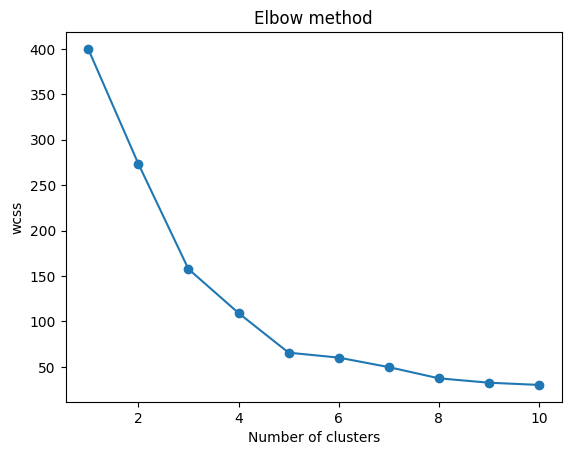

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
clusters=kmeans.fit_predict(features_scaled)

In [ ]:
data['Cluster']=clusters
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1    Male   19                  15                      39        4
1           2    Male   21                  15                      81        2
2           3  Female   20                  16                       6        4
3           4  Female   23                  16                      77        2
4           5  Female   31                  17                      40        4


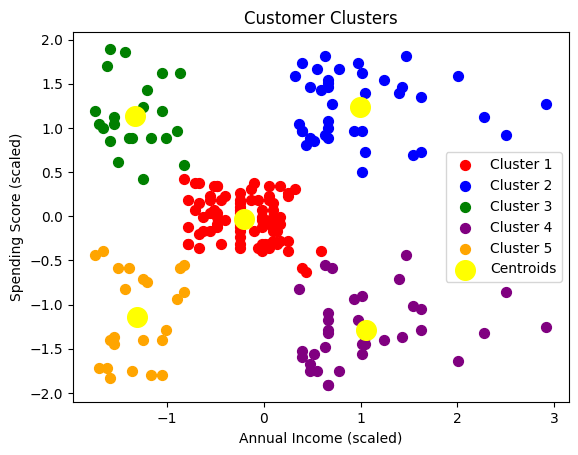

In [ ]:

plt.scatter(features_scaled[clusters == 0, 0], features_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(features_scaled[clusters == 1, 0], features_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(features_scaled[clusters == 2, 0], features_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(features_scaled[clusters == 3, 0], features_scaled[clusters == 3, 1], s=50, c='purple', label='Cluster 4')
plt.scatter(features_scaled[clusters == 4, 0], features_scaled[clusters == 4, 1], s=50, c='orange', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()